In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = "/content/drive/MyDrive/cytoautocluster_dataset/Levine_32dim.fcs.csv"
data = pd.read_csv(file_path)


In [3]:
data

Event       Time  Cell_length      DNA1      DNA2    CD45RA  \
0            1    2693.00           22  4.391057  4.617262  0.162691   
1            2    3736.00           35  4.340481  4.816692  0.701349   
2            3    7015.00           32  3.838727  4.386369  0.603568   
3            4    7099.00           29  4.255806  4.830048  0.433747   
4            5    7700.00           25  3.976909  4.506433 -0.008809   
...        ...        ...          ...       ...       ...       ...   
265622  265623  707951.44           41  6.826629  7.133022  1.474081   
265623  265624  708145.44           45  6.787791  7.154026  0.116755   
265624  265625  708398.44           41  6.889866  7.141219  0.684921   
265625  265626  708585.44           39  6.865218  7.144353  0.288761   
265626  265627  709122.44           41  6.887820  7.127359  0.360753   

           CD133      CD19      CD22     CD11b  ...     CD117     CD49d  \
0      -0.029585 -0.006696  0.066388 -0.009184  ...  0.053050  0.853505   
1      -0.038280 -0.016654  0.074409  0.808031  ...  0.089660  0.197818   
2      -0.032216  0.073855 -0.042977 -0.001881  ...  0.046222  2.586670   
3      -0.027611 -0.017661 -0.044072  0.733698  ...  0.066470  1.338669   
4      -0.030297  0.080423  0.495791  1.107627  ... -0.006223  0.180924   
...          ...       ...       ...       ...  ...       ...       ...   
265622 -0.019174 -0.055620 -0.007261  0.063395  ... -0.011105  0.533736   
265623 -0.056213 -0.008864 -0.035158 -0.041845  ...  0.143869  1.269464   
265624 -0.006264 -0.026111 -0.030837 -0.034641  ...  0.087102 -0.055912   
265625 -0.011310 -0.048786  0.073983 -0.031787  ... -0.047971  0.101955   
265626  0.128604 -0.006934  0.109846  3.864711  ...  0.080195  0.037962   

          HLA-DR      CD64      CD41  Viability  file_number  event_number  \
0       1.664480 -0.005376 -0.001961   0.648429     3.627711           307   
1       0.491592  0.144814  0.868014   0.561384     3.627711           545   
2       1.308337 -0.010961 -0.010413   0.643337     3.627711          1726   
3       0.140523 -0.013449 -0.026039  -0.026523     3.627711          1766   
4       0.197332  0.076167 -0.040488   0.283287     3.627711          2031   
...          ...       ...       ...        ...          ...           ...   
265622  0.123758 -0.042495 -0.027971   0.236957     3.669327        102686   
265623  0.047215 -0.008000 -0.025811  -0.003500     3.669327        102690   
265624  0.501536  0.053884 -0.042602   0.107206     3.669327        102701   
265625  6.200001  0.296877  0.192786   0.620872     3.669327        102706   
265626  3.675123 -0.000878 -0.052526   0.310466     3.669327        102720   

        label  individual  
0         1.0           1  
1         1.0           1  
2         1.0           1  
3         1.0           1  
4         1.0           1  
...       ...         ...  
265622    NaN           2  
265623    NaN           2  
265624    NaN           2  
265625    NaN           2  
265626    NaN           2  

[265627 rows x 42 columns]

In [4]:
import matplotlib.pyplot as plt
print("Data loaded successfully")


Data loaded successfully


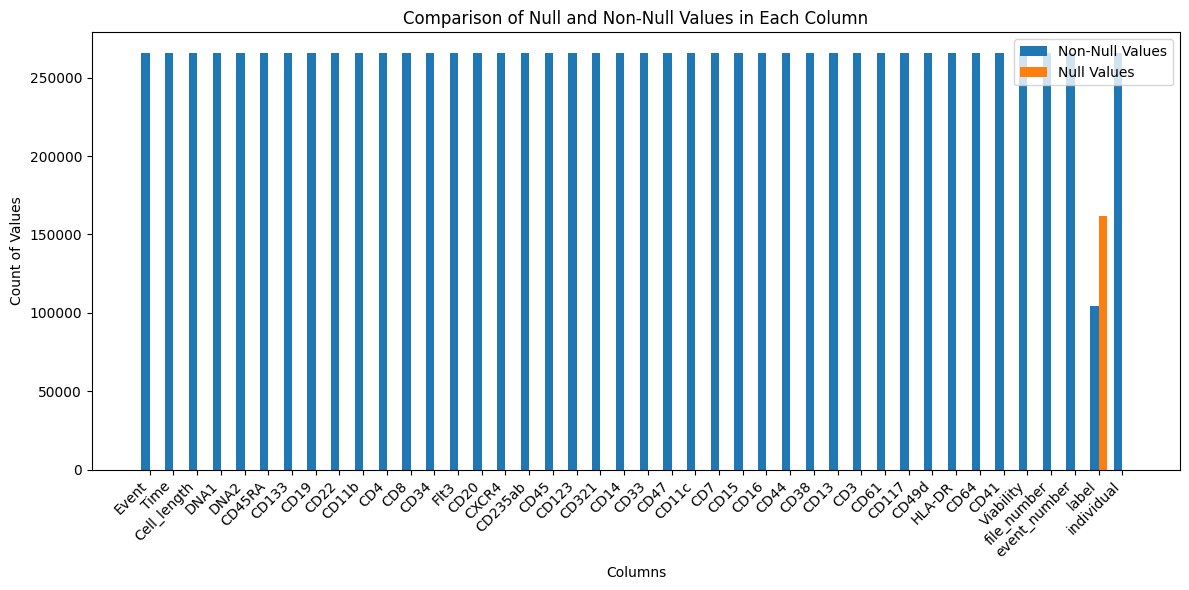

In [5]:
import numpy as np
# Proceed if the data is available
if data is not None:
    # Step 1: Calculate the number of null and non-null values for each column
    null_counts = data.isnull().sum()  # Number of null values per column
    non_null_counts = data.notnull().sum()  # Number of non-null values per column

    # Step 2: Create a list of column names for the x-axis
    columns = data.columns

    # Step 3: Set the width for the bars and the positions for each set
    bar_width = 0.35
    index = np.arange(len(columns))  # The x locations for the groups

    # Step 4: Create the plot using plt.bar() twice for separate bars
    plt.figure(figsize=(12, 6))

    # Plot for Non-Null values (left bar for each column)
    plt.bar(index, non_null_counts, bar_width, label='Non-Null Values', color='#1f77b4')

    # Plot for Null values (right bar for each column)
    plt.bar(index + bar_width, null_counts, bar_width, label='Null Values', color='#ff7f0e')

    # Step 5: Add labels, title, and legend
    plt.xlabel('Columns')
    plt.ylabel('Count of Values')
    plt.title('Comparison of Null and Non-Null Values in Each Column')

    # Set the x-ticks to be in the middle of the bars
    plt.xticks(index + bar_width / 2, columns, rotation=45, ha='right')

    # Add the legend
    plt.legend()

    # Show the plot
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()
else:
    print("No data available for visualization.")


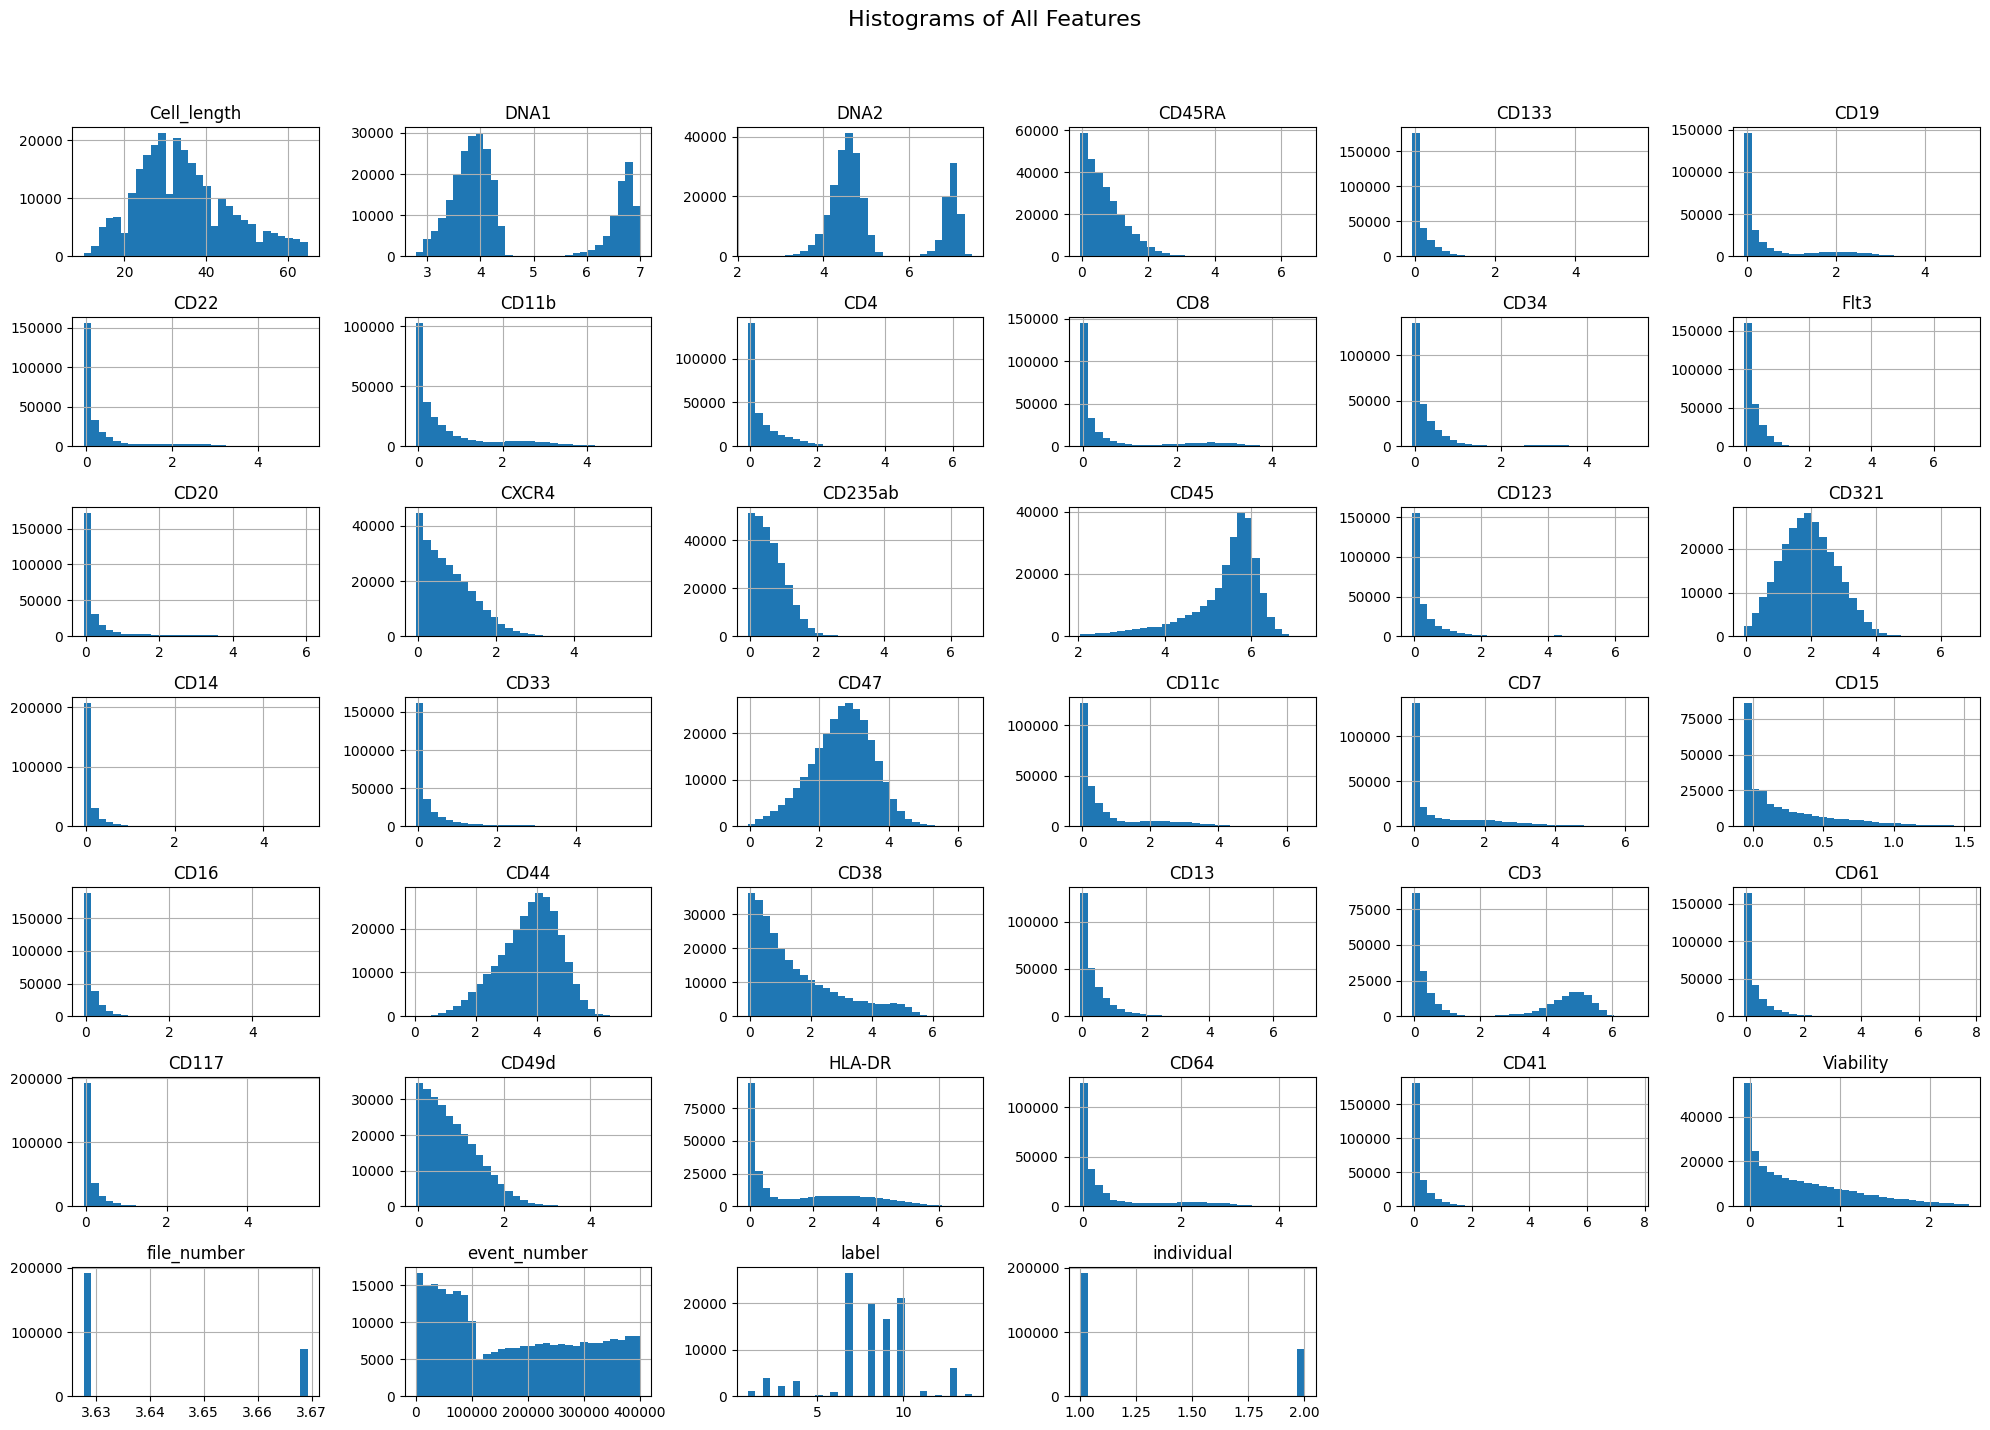

In [6]:


## Drop the 'Event' and 'Time' columns before plotting
data.drop(['Event', 'Time'], axis=1).hist(bins=30, figsize=(20, 15))

# Adjust the title and layout
plt.suptitle('Histograms of All Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

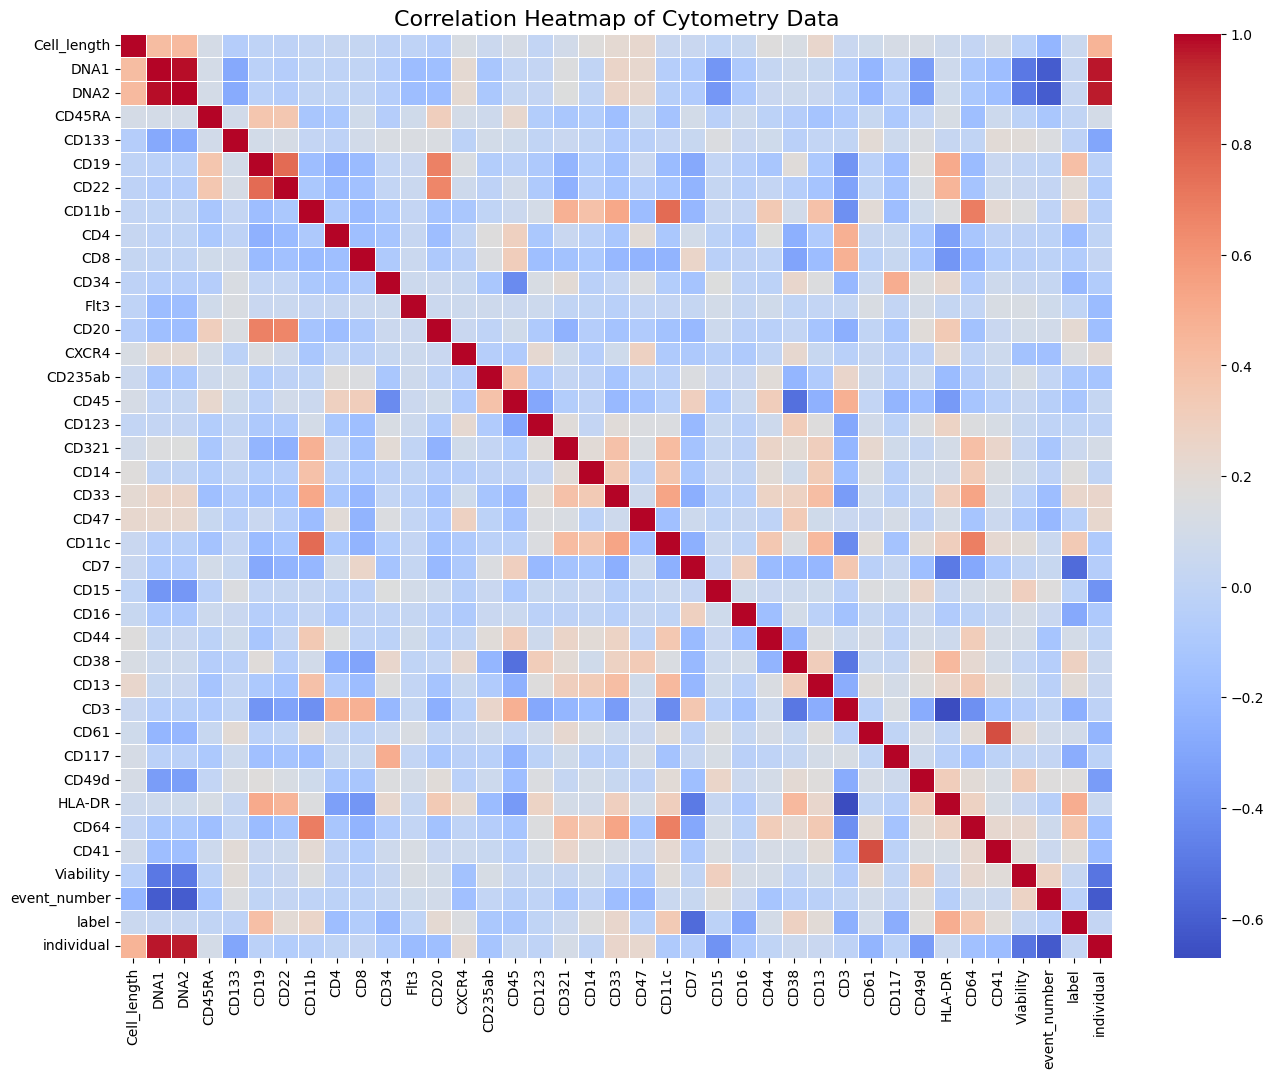

In [7]:
import seaborn as sns

# Drop 'Event', 'Time', and 'File No' columns before computing the correlation matrix
# Using errors='ignore' will prevent errors if the columns don't exist
correlation_matrix = data.drop(['Event', 'Time', 'file_number'], axis=1, errors='ignore').corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Cytometry Data', fontsize=16)
plt.show()


     Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
min         10.0  2.786488  2.236450 -0.057305 -0.058081 -0.058089 -0.057342   
max         65.0  7.001489  7.472308  6.691197  5.527494  4.990085  5.160477   

        CD11b       CD4       CD8  ...     CD117     CD49d    HLA-DR  \
min -0.058236 -0.057751 -0.058003  ... -0.057668 -0.058064 -0.057974   
max  5.260789  6.581762  4.693694  ...  5.502125  5.153438  7.052507   

         CD64      CD41  Viability  file_number  event_number  label  \
min -0.058199 -0.058244  -0.057979     3.627711           1.0    1.0   
max  4.517843  7.718288   2.433031     3.669327      400112.0   14.0   

     individual  
min         1.0  
max         2.0  

[2 rows x 40 columns]


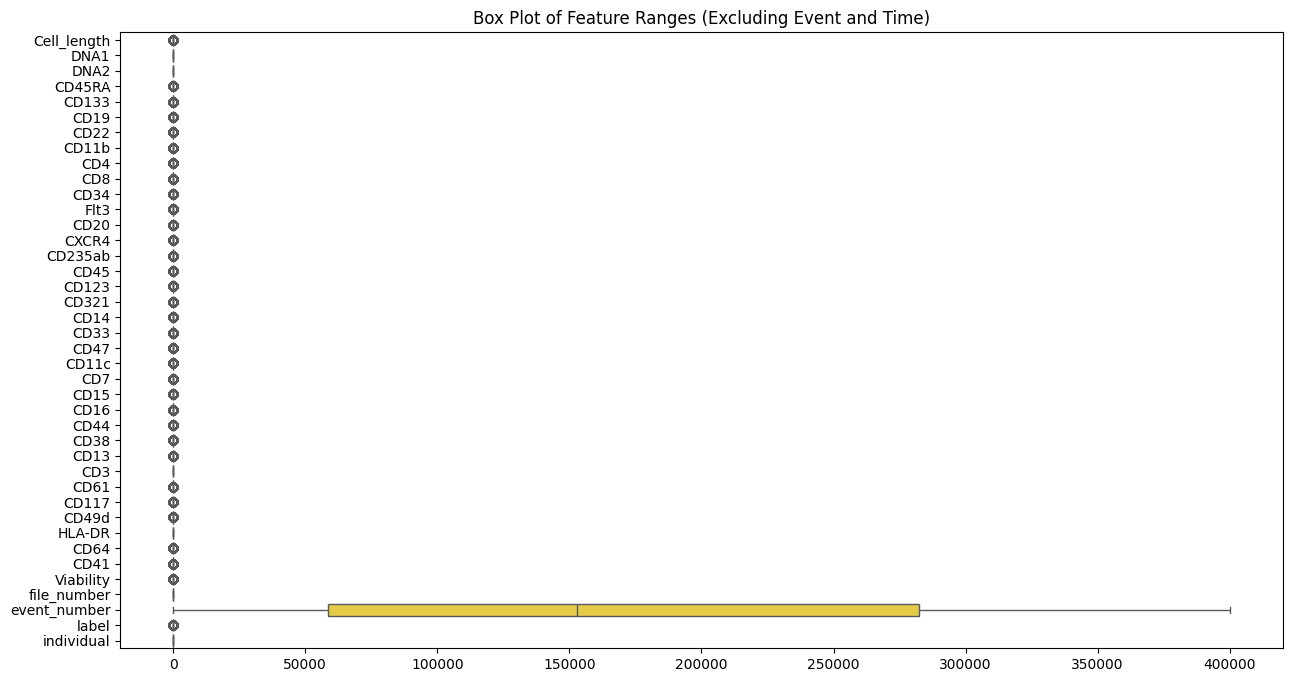

In [8]:
 data_filtered = data.drop(['Event', 'Time'], axis=1)
 data_description = data_filtered.describe()
 # Display the min and max values for each feature
 print(data_description.loc[['min', 'max']])
 # Optional: Visualize the range of each feature using box plots
 plt.figure(figsize=(15, 8))
 sns.boxplot(data=data_filtered, orient='h', palette='Set2')
 plt.title('Box Plot of Feature Ranges (Excluding Event and Time)')
 plt.show()



<ipython-input-9-592c63dab22c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


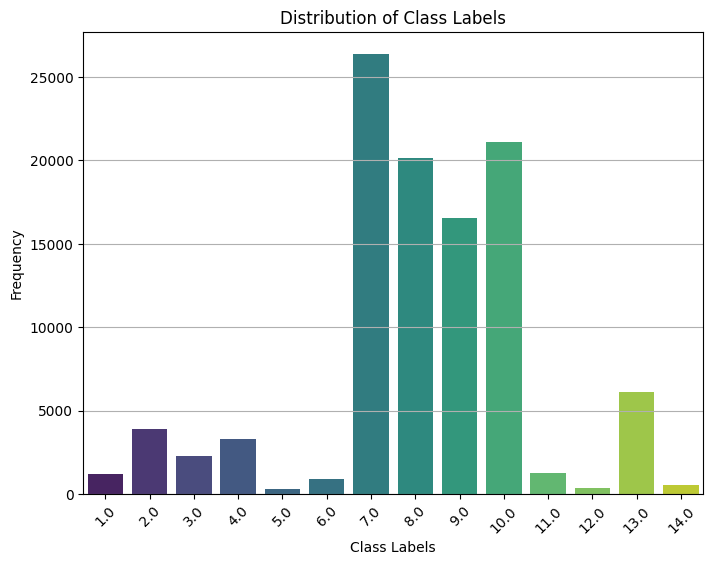

In [9]:
# Drop null values from the 'label' column
class_distribution = data['label'].dropna().value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Class Labels')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Remove null values from the 'label' column
data = data[data['label'].notnull()]

# Calculate the distribution of class labels
class_distribution = data['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Class Labels')
plt.xticks(rotation=45)
plt.show()


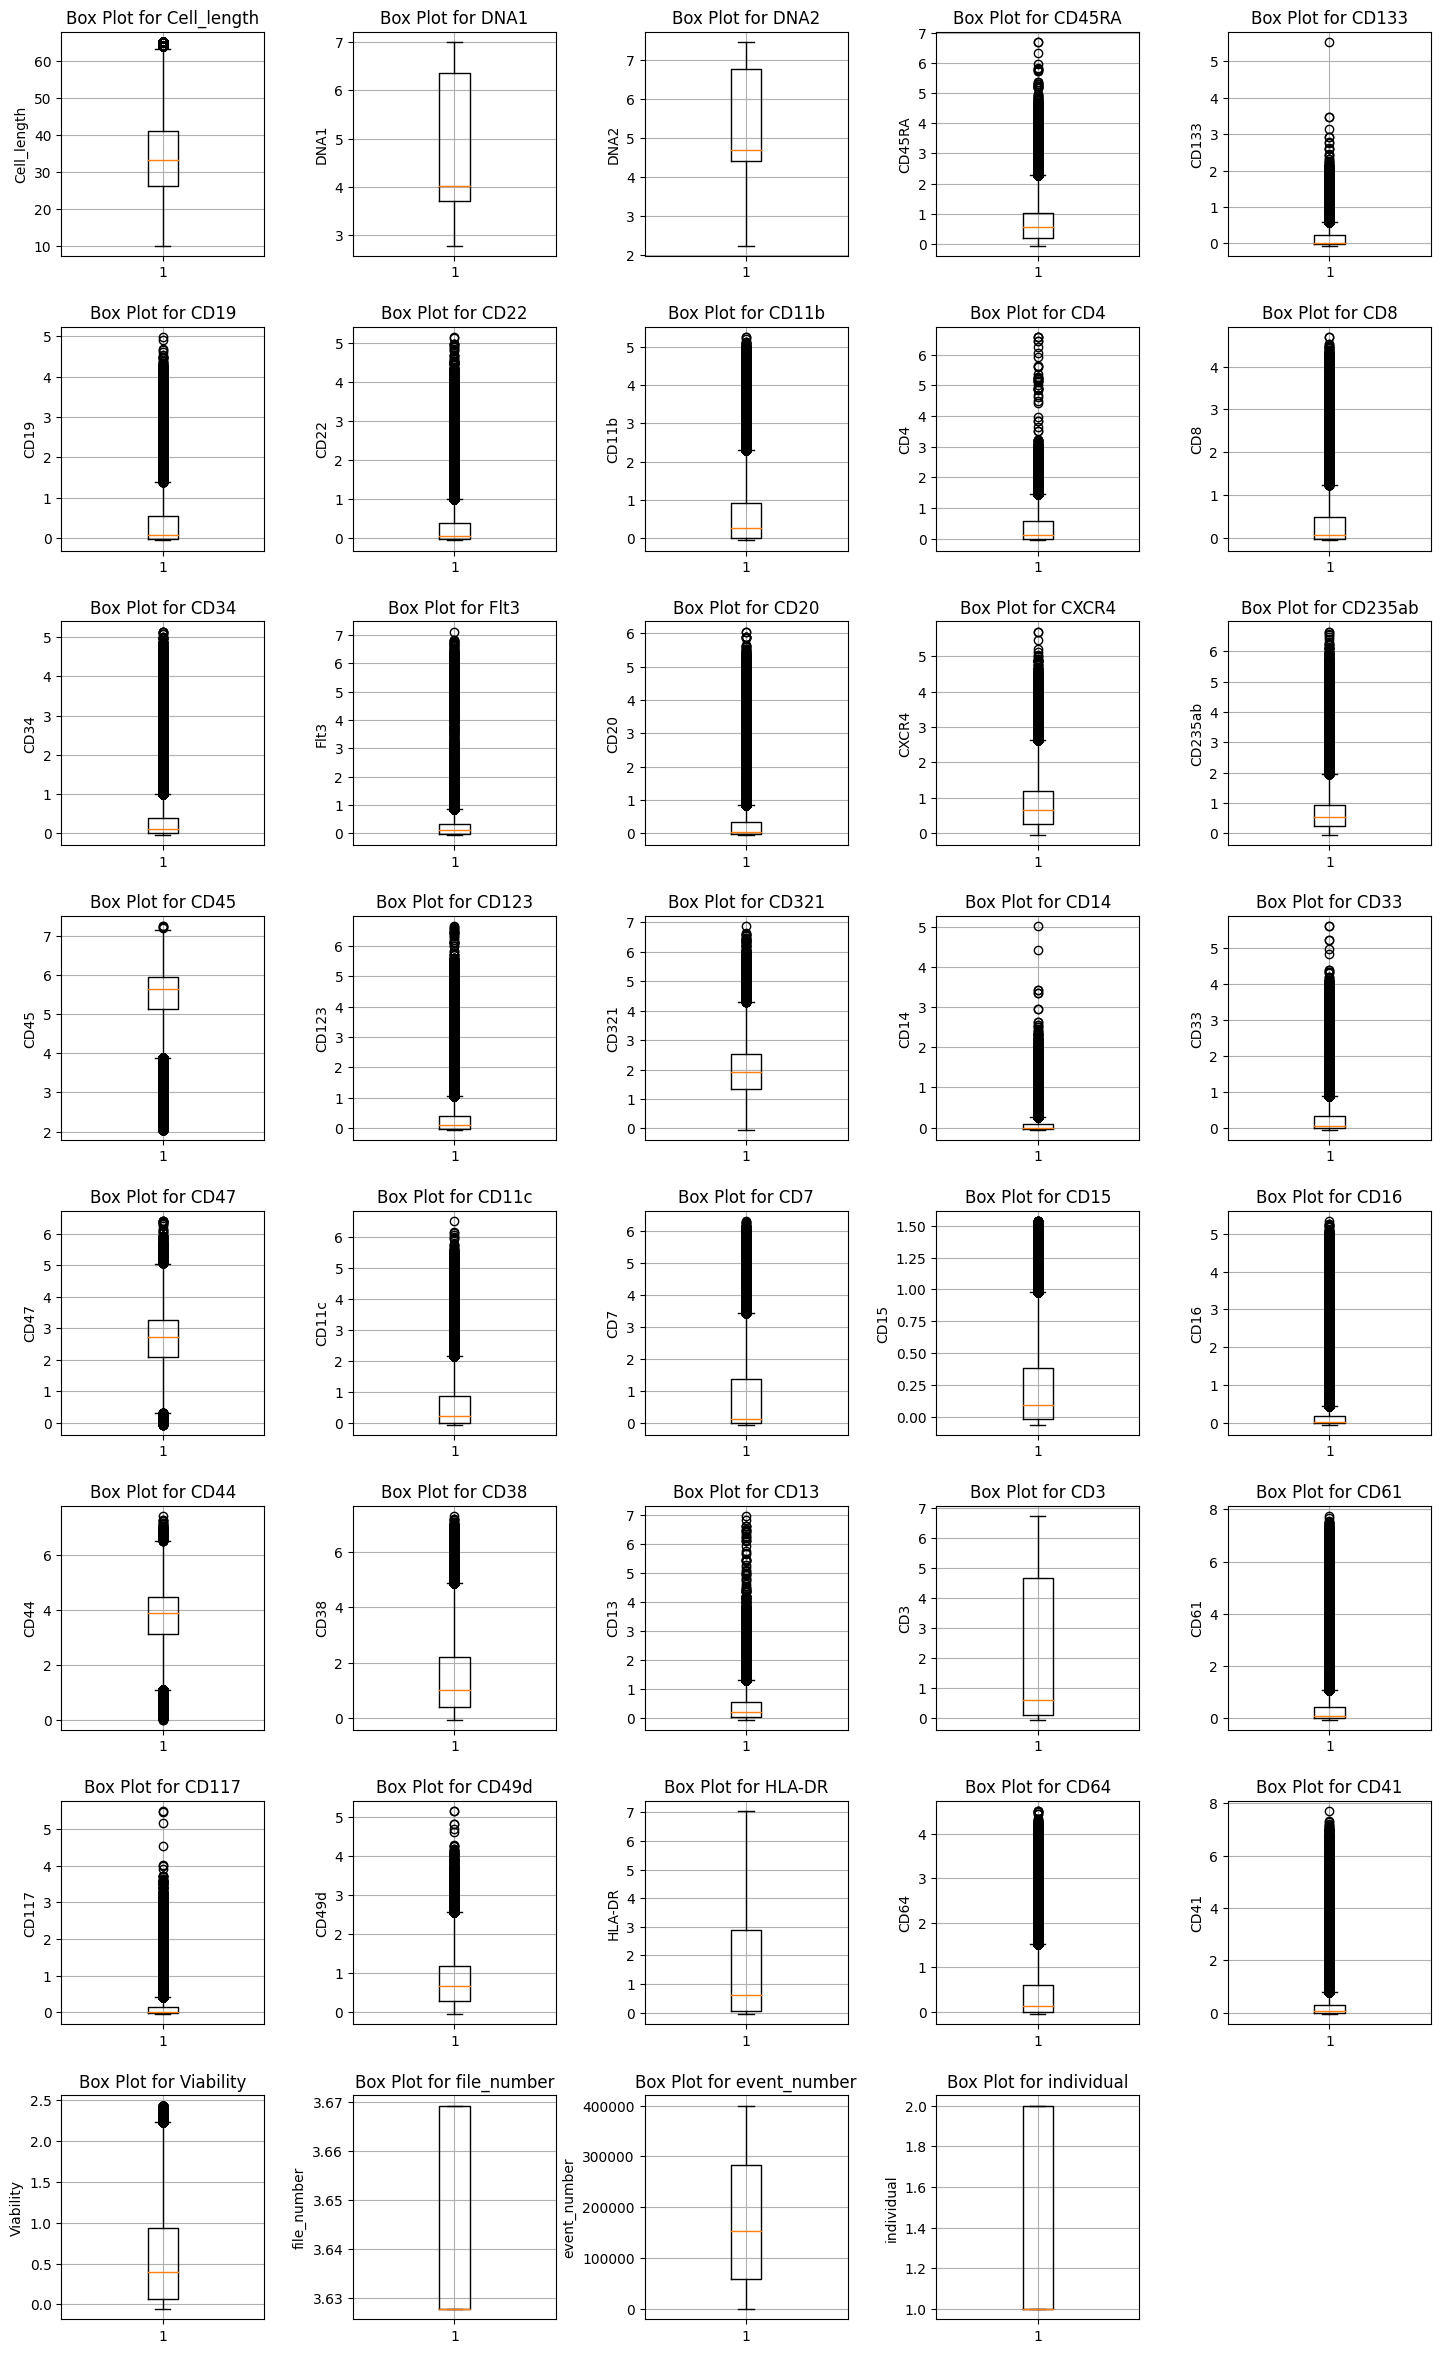

In [10]:



# List of features to analyze, excluding 'Event', 'Time', and 'label' columns
features = [col for col in data.columns if col not in ['Event', 'Time', 'label']]

# Define the number of plots per row
plots_per_row = 5
# Calculate the total number of rows needed
num_rows = (len(features) + plots_per_row - 1) // plots_per_row

# Set the figure size (width x height)
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 3))
fig.tight_layout(pad=3)

# Iterate over each feature and plot its box plot in the grid
for i, feature in enumerate(features):
    row = i // plots_per_row
    col = i % plots_per_row
    ax = axes[row, col] if num_rows > 1 else axes[col]

    ax.boxplot(data[feature].dropna())  # Box plot for the current feature
    ax.set_title(f'Box Plot for {feature}')
    ax.set_ylabel(feature)
    ax.grid()

# Hide any unused subplots
for i in range(len(features), num_rows * plots_per_row):
    row = i // plots_per_row
    col = i % plots_per_row
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.axis('off')

# Display the plots
plt.show()



In [11]:
# Calculate min and max values for each feature (excluding 'Event' and 'Time')
features = data.columns.difference(['Event', 'Time'])

# Get min and max values
min_max_values = data[features].agg(['min', 'max'])

# Display the min and max values
print(min_max_values)


        CD117     CD11b     CD11c     CD123      CD13     CD133      CD14  \
min -0.057668 -0.058236 -0.058053 -0.058003 -0.057728 -0.058081 -0.057954   
max  5.502125  5.260789  6.520939  6.640626  6.981187  5.527494  5.006121   

         CD15      CD16      CD19  ...  Cell_length      DNA1      DNA2  \
min -0.058077 -0.057780 -0.058089  ...           10  2.786488  2.236450   
max  1.534151  5.338305  4.990085  ...           65  7.001489  7.472308   

         Flt3    HLA-DR  Viability  event_number  file_number  individual  \
min -0.057884 -0.057974  -0.057979             1     3.627711           1   
max  7.117323  7.052507   2.433031        400112     3.669327           2   

     label  
min    1.0  
max   14.0  

[2 rows x 40 columns]


In [12]:
import pandas as pd
from scipy.stats import kurtosis

# Exclude 'Event' and 'Time' columns
features = data.columns.difference(['Event', 'Time'])

# Calculate skewness and kurtosis for each feature
skewness = data[features].skew()  # Calculate skewness
kurtosis_values = data[features].apply(lambda x: kurtosis(x, fisher=False))  # Calculate kurtosis

# Create a DataFrame to hold skewness and kurtosis values
skew_kurt_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis_values
})

# Display the skewness and kurtosis DataFrame
print("Skewness and Kurtosis for each feature:")
print(skew_kurt_df)


Skewness and Kurtosis for each feature:
              Skewness   Kurtosis
CD117         4.097531  26.375108
CD11b         1.679098   4.964495
CD11c         1.733898   5.117156
CD123         3.648911  18.361217
CD13          2.234324  10.637564
CD133         2.141965   9.190066
CD14          3.609026  23.062535
CD15          1.445155   4.504387
CD16          5.733236  42.287749
CD19          1.682619   4.590887
CD20          2.754715  10.435449
CD22          2.283194   7.500223
CD235ab       2.001491  13.440586
CD3           0.342241   1.264612
CD321         0.247098   2.914593
CD33          2.724993  10.967536
CD34          3.492457  16.596416
CD38          1.141488   3.521190
CD4           1.622053   5.844261
CD41          5.366344  41.521113
CD44         -0.431592   2.918792
CD45         -1.484832   5.246770
CD45RA        1.191601   4.964272
CD47         -0.250324   2.943834
CD49d         0.856810   3.468119
CD61          4.894735  34.878020
CD64          1.743742   4.910631
CD7     

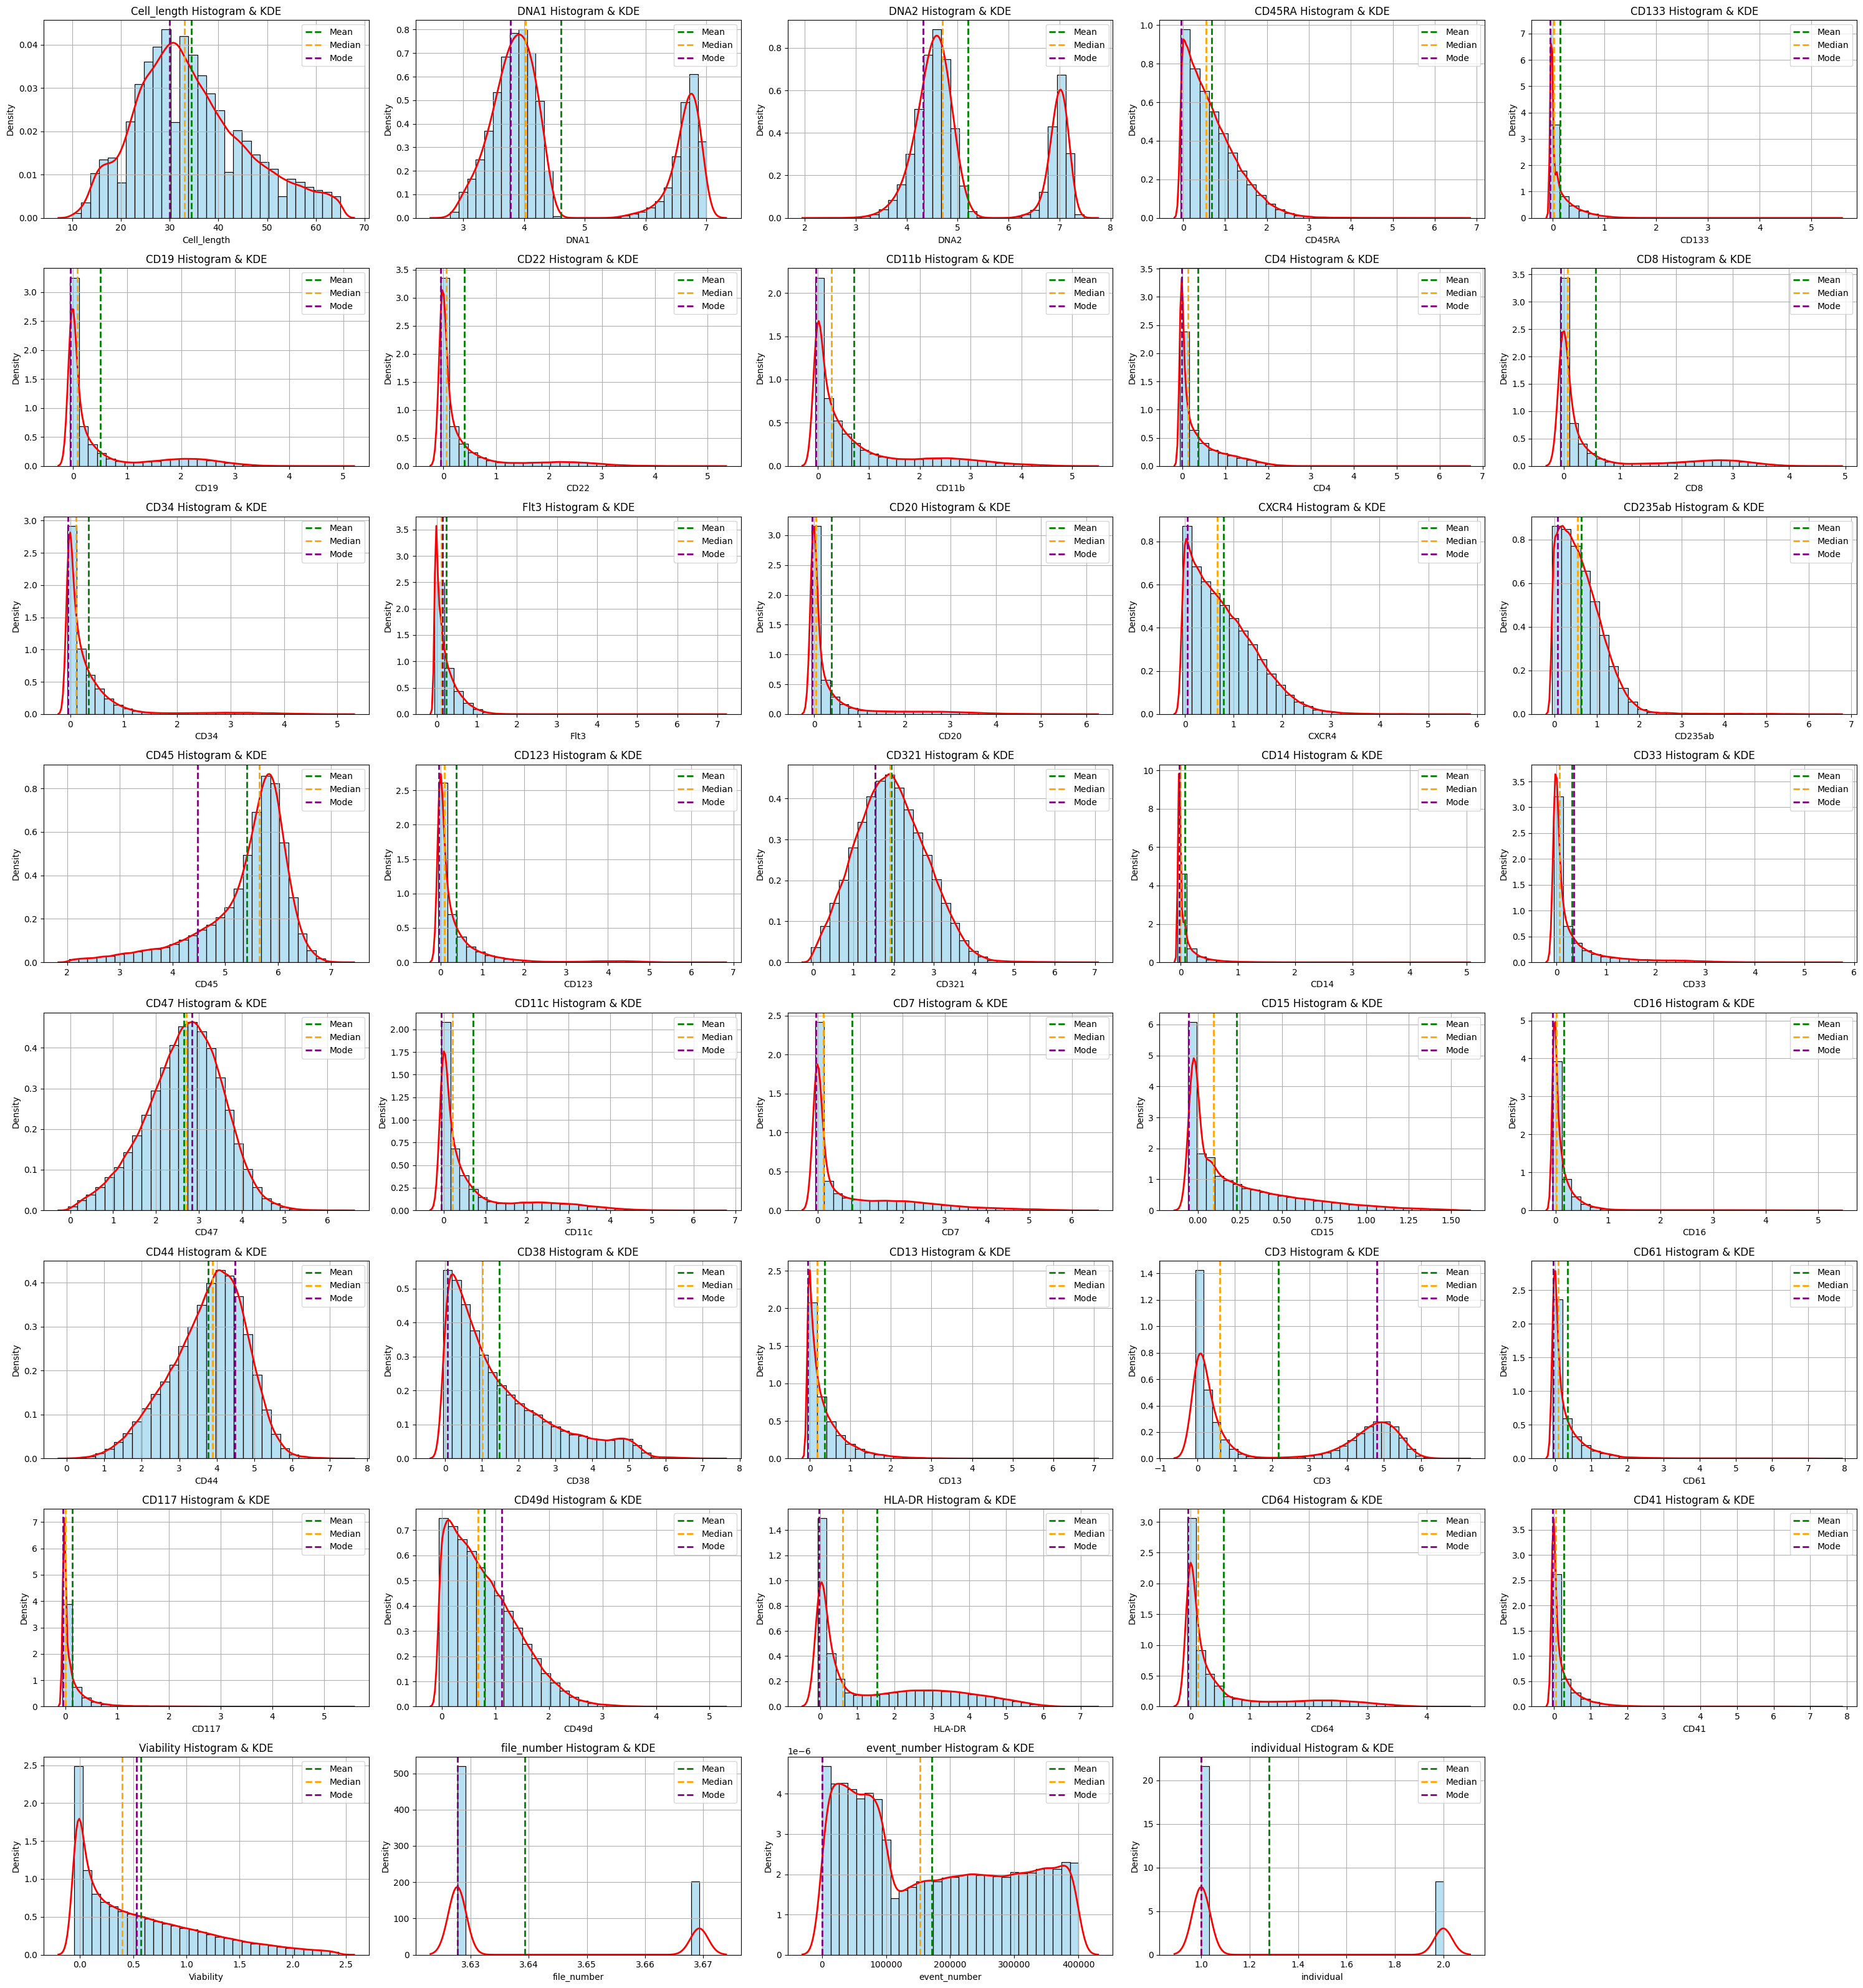

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to analyze, excluding any unnecessary columns
features = [col for col in data.columns if col not in ['Event', 'Time', 'label']]  # Modify exclusions as needed

# Set number of plots per row
plots_per_row = 5
num_features = len(features)

# Calculate the number of rows needed
num_rows = (num_features // plots_per_row) + int(num_features % plots_per_row != 0)

# Create subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 6, num_rows * 4))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through each feature and create the histogram and KDE plot
for idx, feature_name in enumerate(features):
    feature_data = data[feature_name].dropna()  # Remove NaN values for the feature

    # Calculate mean, median, and mode
    mean_value = feature_data.mean()
    median_value = feature_data.median()
    mode_value = feature_data.mode()[0] if not feature_data.mode().empty else mean_value  # Handle empty mode case

    # Plot histogram and KDE
    sns.histplot(feature_data, bins=30, kde=True, color='skyblue', stat='density', ax=axes[idx], alpha=0.6)
    sns.kdeplot(feature_data, color='red', ax=axes[idx], linewidth=2)

    # Add lines for mean, median, and mode
    axes[idx].axvline(mean_value, color='green', linestyle='dashed', linewidth=2, label='Mean')
    axes[idx].axvline(median_value, color='orange', linestyle='dashed', linewidth=2, label='Median')
    axes[idx].axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Mode')

    # Customize each plot
    axes[idx].set_title(f'{feature_name} Histogram & KDE')
    axes[idx].set_xlabel(feature_name)
    axes[idx].set_ylabel('Density')
    axes[idx].legend()
    axes[idx].grid(True)

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


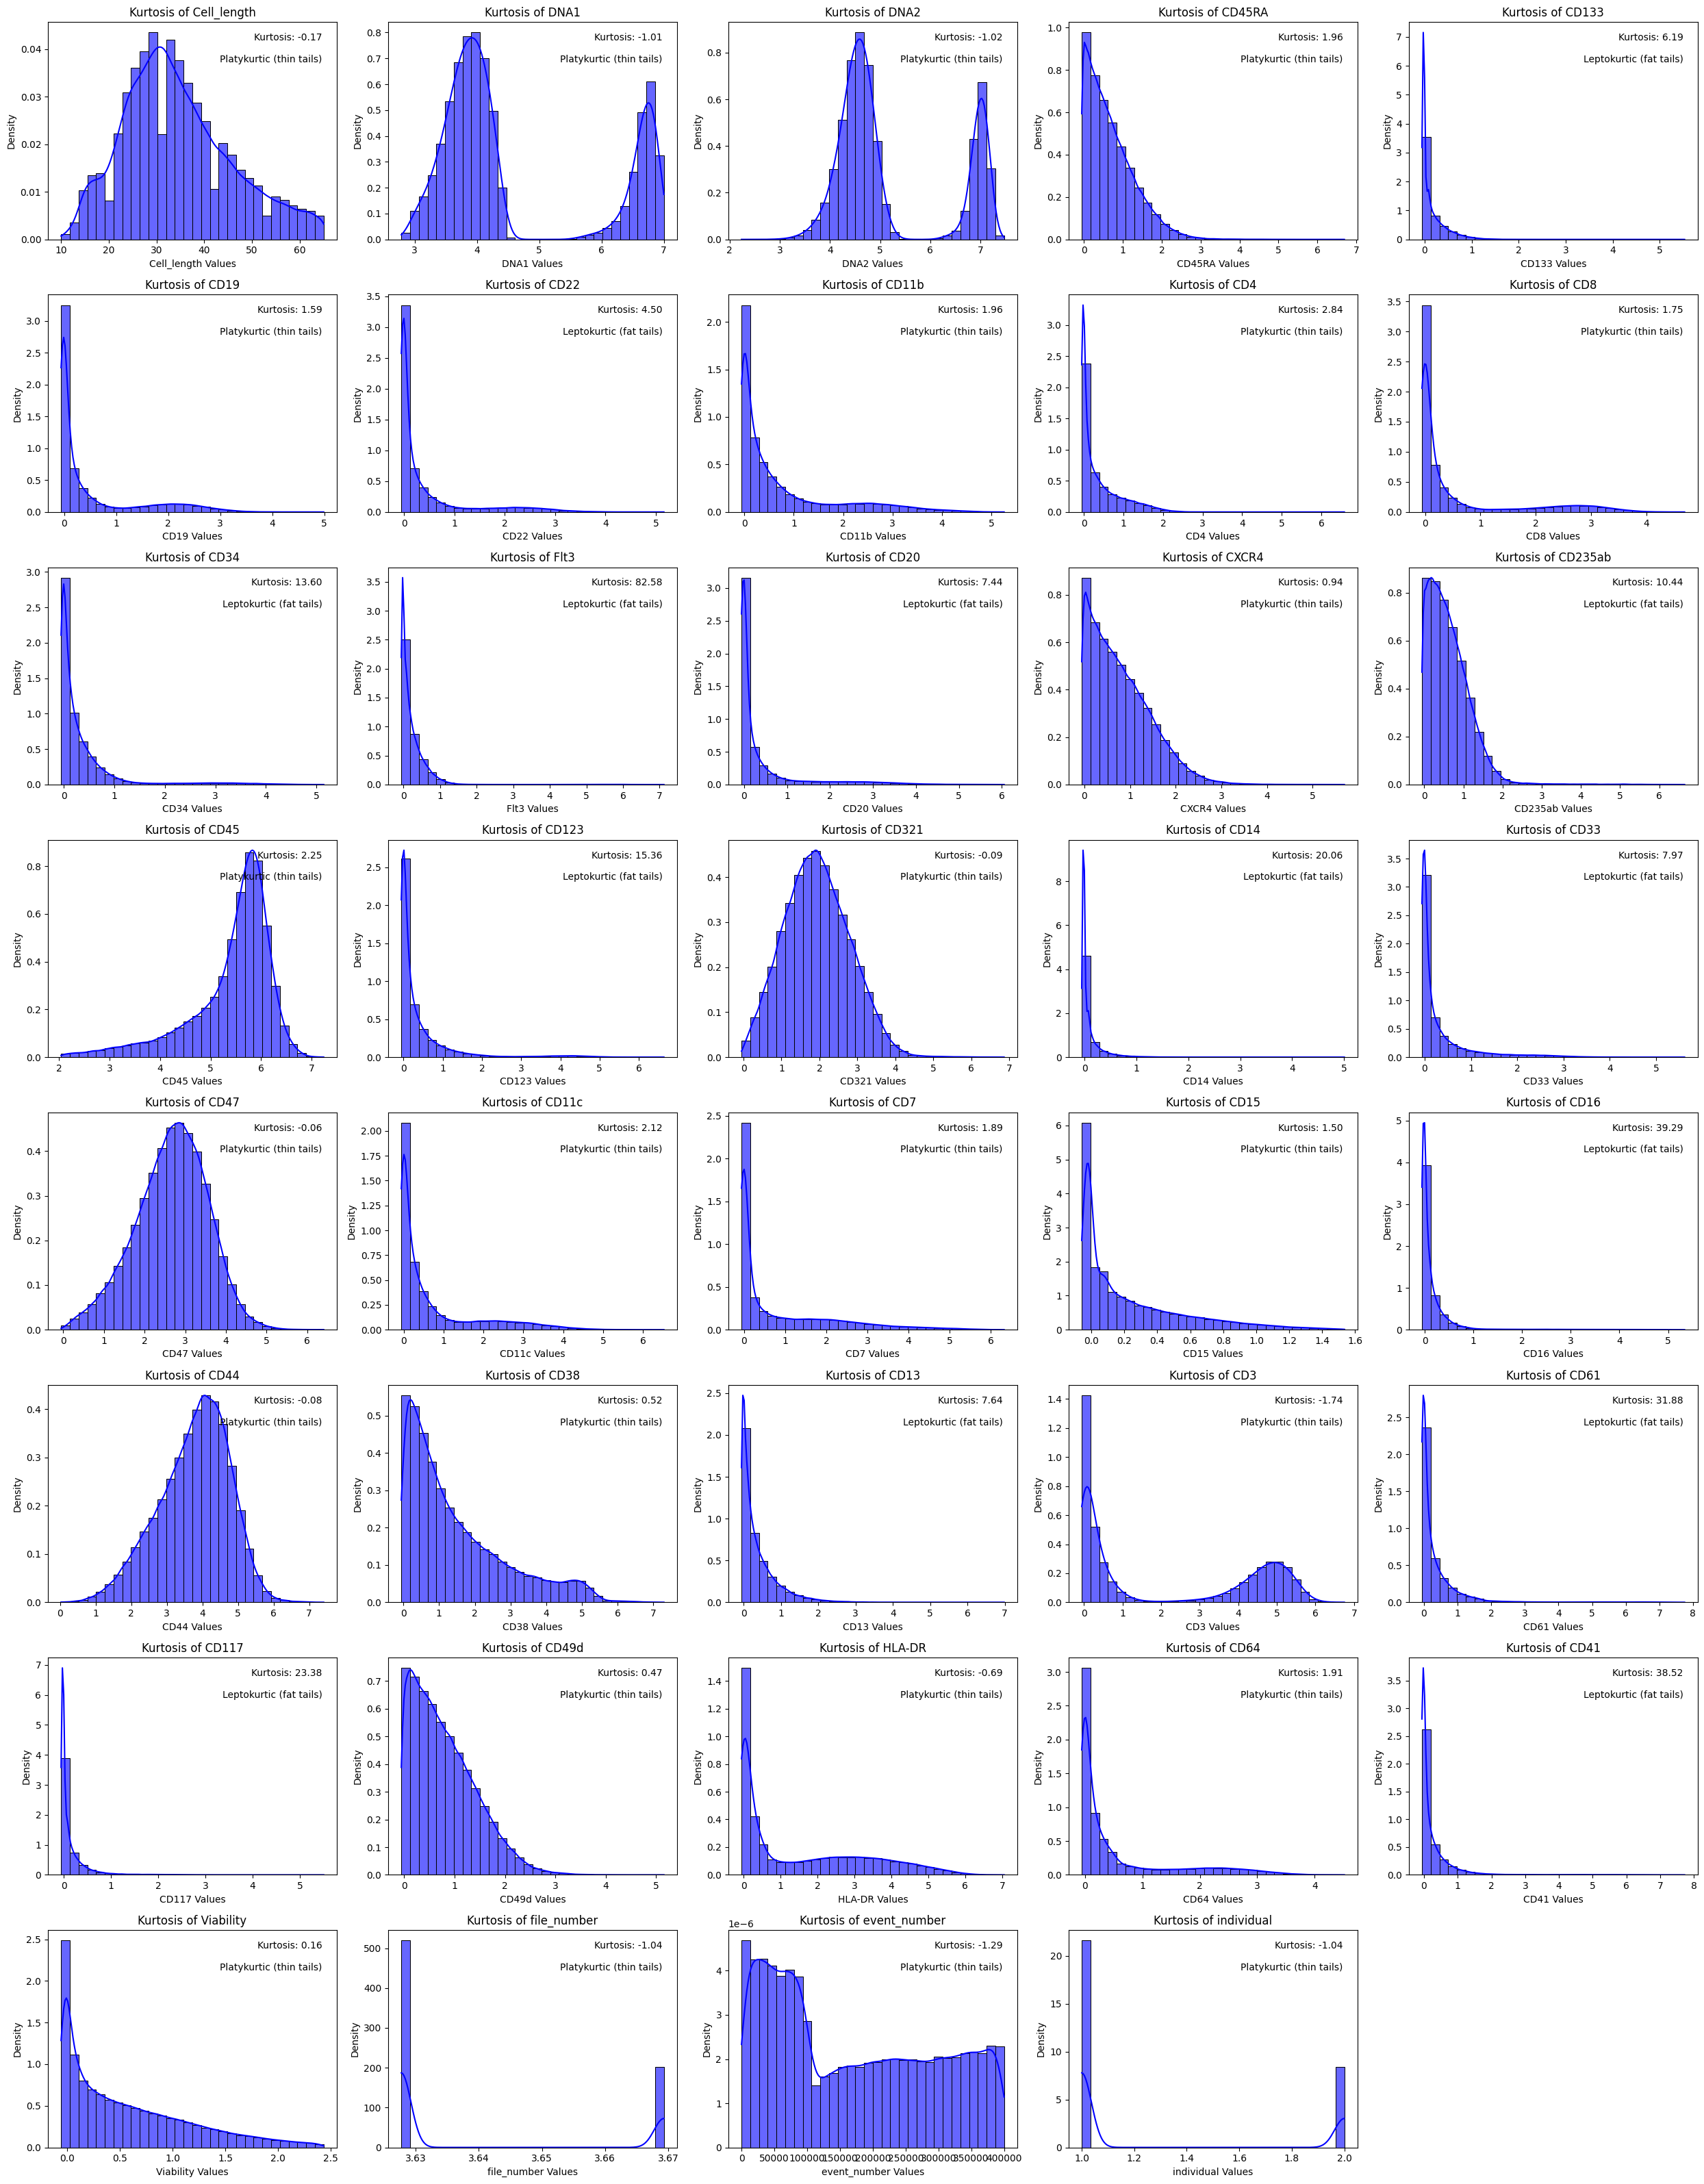

In [14]:

from scipy.stats import kurtosis

# List of features to analyze, excluding any unnecessary columns
features = [col for col in data.columns if col not in ['Event', 'Time', 'label']]  # Modify exclusions as needed

# Set up the grid layout for 5 plots per row
plots_per_row = 5
num_features = len(features)
num_rows = (num_features // plots_per_row) + (num_features % plots_per_row > 0)

# Create subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 5, num_rows * 4))
axes = axes.flatten()  # Flatten for easy indexing

# Iterate over each feature to plot its kurtosis
for idx, feature_name in enumerate(features):
    feature_data = data[feature_name].dropna()  # Remove any NaN values for the feature

    # Calculate kurtosis
    kurtosis_value = kurtosis(feature_data)

    # Plot histogram and KDE
    sns.histplot(feature_data, bins=30, kde=True, color='blue', stat='density', ax=axes[idx], alpha=0.6)

    # Display kurtosis on the plot
    axes[idx].text(0.95, 0.95, f'Kurtosis: {kurtosis_value:.2f}',
                   horizontalalignment='right', verticalalignment='top',
                   transform=axes[idx].transAxes, fontsize=10)

    # Add a description of kurtosis type based on the value
    if kurtosis_value < 3:
        kurtosis_type = "Platykurtic (thin tails)"
    elif kurtosis_value == 3:
        kurtosis_type = "Mesokurtic (medium tails)"
    else:
        kurtosis_type = "Leptokurtic (fat tails)"

    axes[idx].text(0.95, 0.85, kurtosis_type,
                   horizontalalignment='right', verticalalignment='top',
                   transform=axes[idx].transAxes, fontsize=10)

    # Customize each plot
    axes[idx].set_title(f'Kurtosis of {feature_name}')
    axes[idx].set_xlabel(f'{feature_name} Values')
    axes[idx].set_ylabel('Density')

# Hide any unused subplots
for i in range(len(features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

# Exclude 'Event' and 'Time' columns for standardization
features_to_standardize = data.columns.difference(['Event', 'Time'])

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
data_standardized = data.copy()  # Make a copy of the original data
data_standardized[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

# Display the first few rows of the standardized data
print(data_standardized.head())


   Event    Time  Cell_length      DNA1      DNA2    CD45RA     CD133  \
0      1  2693.0    -1.087702 -0.164453 -0.505101 -0.862639 -0.677085   
1      2  3736.0     0.047999 -0.202977 -0.331737  0.021706 -0.710621   
2      3  7015.0    -0.214086 -0.585171 -0.705816 -0.138826 -0.687231   
3      4  7099.0    -0.476171 -0.267476 -0.320127 -0.417630 -0.669470   
4      5  7700.0    -0.825617 -0.479916 -0.601444 -1.144201 -0.679832   

       CD19      CD22     CD11b  ...     CD117     CD49d    HLA-DR      CD64  \
0 -0.601774 -0.434227 -0.711371  ... -0.249511  0.093316  0.084209 -0.626606   
1 -0.613387 -0.423702  0.096608  ... -0.132623 -0.951407 -0.608084 -0.457614   
2 -0.507832 -0.577727 -0.704150  ... -0.271310  2.854812 -0.126003 -0.632890   
3 -0.614562 -0.579163  0.023115  ... -0.206663  0.866341 -0.815301 -0.635690   
4 -0.500173  0.129202  0.392818  ... -0.438757 -0.978326 -0.781769 -0.534854   

       CD41  Viability  file_number  event_number     label  individual  
0 -0.4

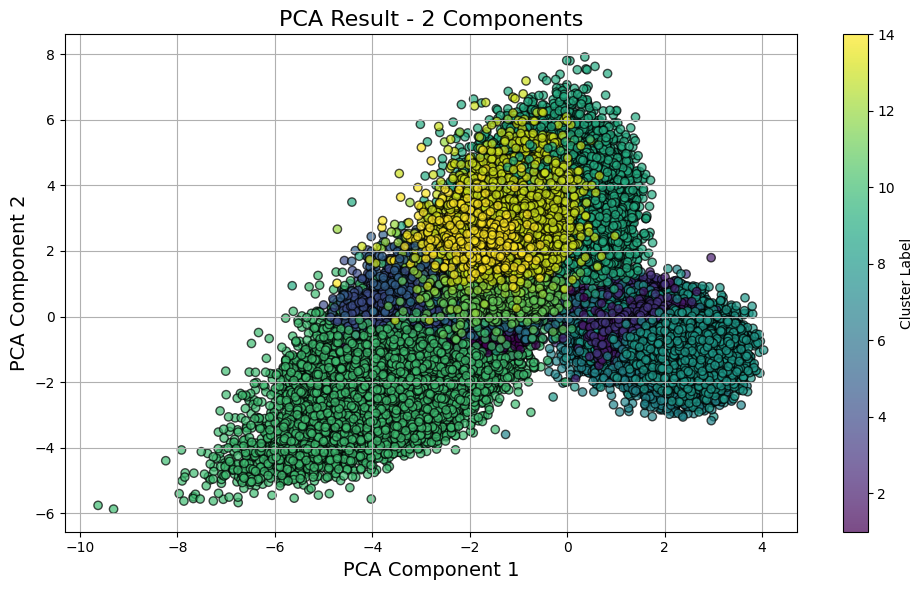

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Exclude the specified columns for PCA
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
features_for_analysis = data.columns.difference(exclude_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features_for_analysis])

# Perform PCA for 2 components
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(scaled_data)

# Create a DataFrame for the 2D PCA results
pca_df_2d = pd.DataFrame(data=pca_result_2d, columns=['PCA Component 1', 'PCA Component 2'])

# Plot the 2D PCA results with different colors for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(pca_df_2d['PCA Component 1'], pca_df_2d['PCA Component 2'], c=data['label'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA Result - 2 Components', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.colorbar(label='Cluster Label')
plt.grid()
plt.tight_layout()
plt.show()

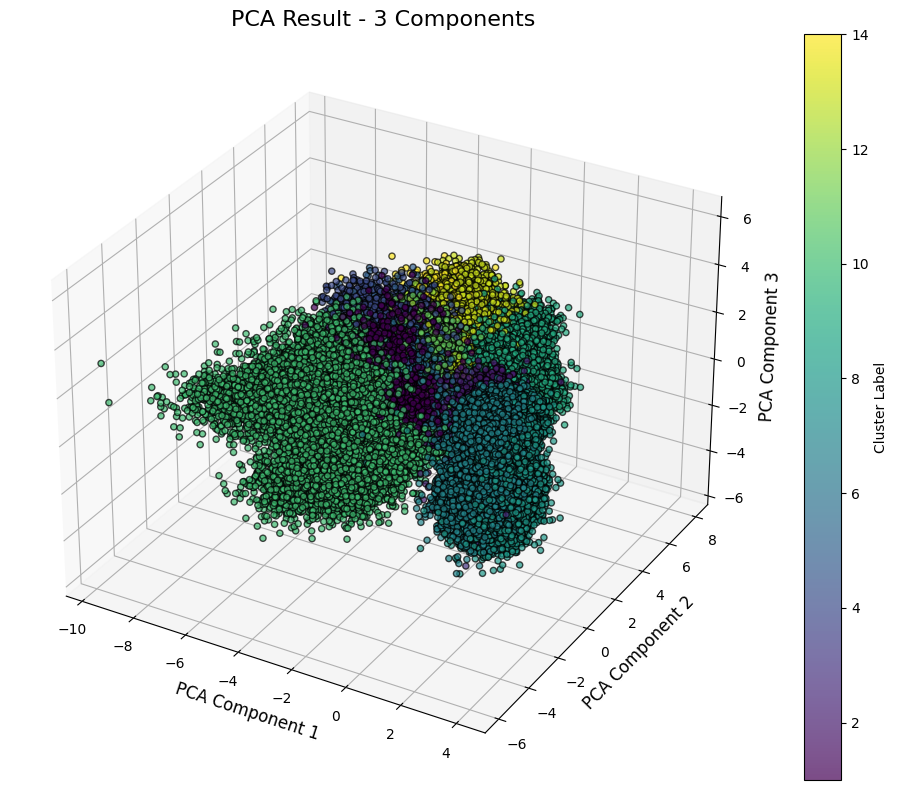

In [17]:
# Perform PCA for 3 components
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(scaled_data)

# Create a DataFrame for the 3D PCA results
pca_df_3d = pd.DataFrame(data=pca_result_3d, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])

# Plot the 3D PCA results with different colors for each cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_3d['PCA Component 1'], pca_df_3d['PCA Component 2'], pca_df_3d['PCA Component 3'],
                     c=data['label'], cmap='viridis', edgecolor='k', alpha=0.7)
ax.set_title('PCA Result - 3 Components', fontsize=16)
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('PCA Component 3', fontsize=12)
fig.colorbar(scatter, ax=ax, label='Cluster Label')
plt.tight_layout()
plt.show()


In [18]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Exclude the specified columns for PCA
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
features_for_analysis = data.columns.difference(exclude_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features_for_analysis])

# Perform PCA
pca = PCA()  # Fit PCA to all components to calculate explained variance
pca.fit(scaled_data)

# Create a DataFrame for the PCA summary
pca_summary = pd.DataFrame({
    'Standard Deviation': pca.explained_variance_**0.5,
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()
}, index=[f'PC{i+1}' for i in range(len(pca.explained_variance_))])

# Display the table
print(pca_summary)


      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1             2.327669                0.154801               0.154801
PC2             1.957437                0.109473               0.264273
PC3             1.877982                0.100766               0.365039
PC4             1.606712                0.073758               0.438797
PC5             1.402681                0.056214               0.495011
PC6             1.243363                0.044170               0.539181
PC7             1.169659                0.039088               0.578270
PC8             1.126861                0.036280               0.614550
PC9             1.079842                0.033316               0.647866
PC10            0.963012                0.026497               0.674363
PC11            0.951218                0.025852               0.700214
PC12            0.906304                0.023468               0.723682
PC13            0.891029                0.022684               0

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


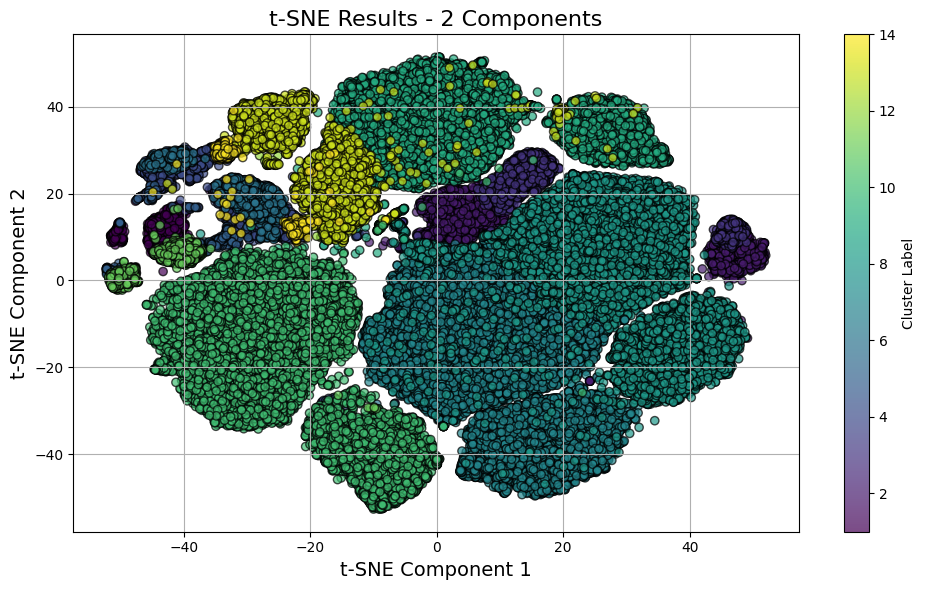

In [19]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Exclude specified columns from the dataset
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data_filtered = data.drop(columns=exclude_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filtered)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Plot the t-SNE results with different colors for each cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['label'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('t-SNE Results - 2 Components', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.colorbar(scatter, label='Cluster Label')
plt.grid()
plt.tight_layout()
plt.show()


In [20]:
import numpy as np
import pandas as pd

# Define the probability of keeping an element
p_m = 0.5  # Adjust the probability as needed (e.g., 0.5 for a 50% chance)

# Generate a binary mask with the same shape as the dataset (1s for keeping, 0s for masking)
mask = np.random.binomial(1, p_m, data.shape)

# Apply the mask to the dataset (0 masks out the values)
masked_data = data * mask

# Display the first few rows of the masked dataset to confirm
print(masked_data.head())


   Event    Time  Cell_length      DNA1      DNA2    CD45RA     CD133  \
0      1  2693.0            0  0.000000  0.000000  0.000000 -0.000000   
1      2     0.0           35  4.340481  0.000000  0.701349 -0.038280   
2      0  7015.0           32  0.000000  4.386369  0.000000 -0.000000   
3      0     0.0            0  0.000000  4.830048  0.000000 -0.027611   
4      0     0.0           25  3.976909  0.000000 -0.008809 -0.000000   

       CD19      CD22     CD11b  ...     CD117     CD49d    HLA-DR      CD64  \
0 -0.006696  0.000000 -0.000000  ...  0.053050  0.853505  0.000000 -0.000000   
1 -0.016654  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.073855 -0.042977 -0.000000  ...  0.046222  2.586670  0.000000 -0.010961   
3 -0.017661 -0.044072  0.733698  ...  0.000000  1.338669  0.000000 -0.013449   
4  0.080423  0.000000  0.000000  ... -0.000000  0.180924  0.197332  0.000000   

       CD41  Viability  file_number  event_number  label  individual  
0 -0.0000